In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_trip = pd.read_csv("trip_updates_(unix_time).csv")
df_vehicle = pd.read_csv("vehicle_positions_(unix_time).csv")

frames = [df_trip, df_vehicle]

df = pd.merge(df_trip, df_vehicle, on=['trip_id','route_id'], how='inner')
df.head()


,trip_id,route_id,stop_id,arrival_time,departure_time,vehicle_id,label,latitude,longitude,bearing,speed,timestamp
0,4065__461034_Timetable_-_2025-02,419,93568,1742663058,1742663114,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
1,4065__461034_Timetable_-_2025-02,419,3537,1742663114,1742663114,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
2,4065__461034_Timetable_-_2025-02,419,3535,1742663136,1742663136,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
3,4065__461034_Timetable_-_2025-02,419,3422,1742663173,1742663173,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
4,4065__461034_Timetable_-_2025-02,419,3366,1742663219,1742663219,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         1220 non-null   object 
 1   route_id        1220 non-null   int64  
 2   stop_id         1220 non-null   int64  
 3   arrival_time    1220 non-null   int64  
 4   departure_time  1220 non-null   int64  
 5   vehicle_id      1220 non-null   int64  
 6   label           0 non-null      float64
 7   latitude        1220 non-null   float64
 8   longitude       1220 non-null   float64
 9   bearing         0 non-null      float64
 10  speed           0 non-null      float64
 11  timestamp       1220 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 114.5+ KB


In [ ]:
df['trip_id'] = df['trip_id'].astype(dtype='category')
df['trip_id_codes'] = df['trip_id'].cat.codes
df.drop(['trip_id'], inplace=True, axis=1)

In [166]:
# drop NaN columns 'bearing', 'speed', 'route_id_y'
df.isnull().sum()
df.drop(columns=['bearing', 'speed', 'label'], inplace=True)


In [167]:
df.head()

,route_id,stop_id,arrival_time,departure_time,vehicle_id,latitude,longitude,timestamp,trip_id_codes
0,419,93568,1742663058,1742663114,8584,43.954517,-78.866684,1742662783,27
1,419,3537,1742663114,1742663114,8584,43.954517,-78.866684,1742662783,27
2,419,3535,1742663136,1742663136,8584,43.954517,-78.866684,1742662783,27
3,419,3422,1742663173,1742663173,8584,43.954517,-78.866684,1742662783,27
4,419,3366,1742663219,1742663219,8584,43.954517,-78.866684,1742662783,27


In [168]:
df.corr()

,route_id,stop_id,arrival_time,departure_time,vehicle_id,latitude,longitude,timestamp,trip_id_codes
route_id,1.000000,-0.192043,0.285021,0.286646,0.051961,-0.015972,-0.116534,0.038496,0.252742
stop_id,-0.192043,1.000000,0.017329,0.016053,0.018224,-0.019731,0.039594,0.085690,-0.111252
arrival_time,0.285021,0.017329,1.000000,0.999418,-0.103450,-0.148370,-0.122326,0.195545,0.037328
departure_time,0.286646,0.016053,0.999418,1.000000,-0.103392,-0.149251,-0.121417,0.196191,0.038545
vehicle_id,0.051961,0.018224,-0.103450,-0.103392,1.000000,-0.289911,-0.044632,-0.319857,0.533761
latitude,-0.015972,-0.019731,-0.148370,-0.149251,-0.289911,1.000000,0.461854,-0.158722,-0.275520
longitude,-0.116534,0.039594,-0.122326,-0.121417,-0.044632,0.461854,1.000000,-0.374367,-0.040930
timestamp,0.038496,0.085690,0.195545,0.196191,-0.319857,-0.158722,-0.374367,1.000000,-0.218484
trip_id_codes,0.252742,-0.111252,0.037328,0.038545,0.533761,-0.275520,-0.040930,-0.218484,1.000000


<Axes: >

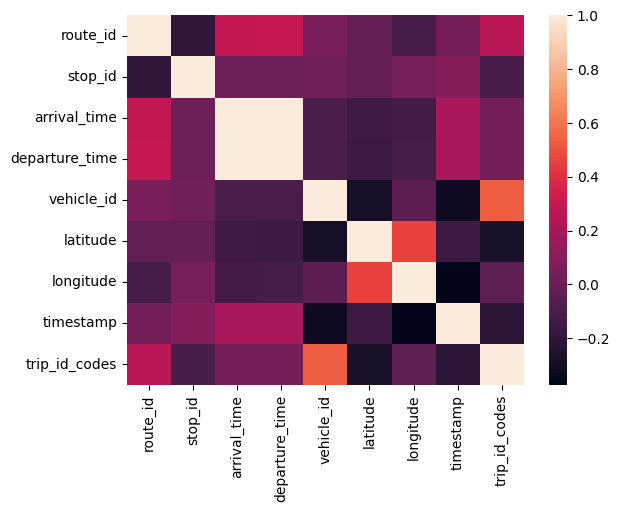

In [169]:
import seaborn as sns

sns.heatmap(df.corr())
# df.value_counts().plot(kind='bar')

In [ ]:
df_stops = pd.read_csv("./../static/stops.txt")
df_stops.drop(['stop_desc', 'zone_id', 'stop_url', 'parent_station', 'stop_timezone'], axis=1, inplace=True)
df_stops.head(3)

df = pd.merge(df, df_stops, on='stop_id', how='inner')
# df_stops.head(5)

In [210]:
from geographiclib.geodesic import Geodesic

def calculate_dist(row):
    geod = Geodesic.WGS84
    result = geod.InverseLine(
        row['latitude'], row['longitude'],
        row['stop_lat'], row['stop_lon']
    )
    return result.s13

df['distance_vpos_stop'] = df.apply(calculate_dist, axis=1)
df.head(5)

,route_id,stop_id,arrival_time,departure_time,vehicle_id,latitude,longitude,timestamp,trip_id_codes,stop_code,stop_lat,stop_lon,wheelchair_boarding,preferred,arrival_delay,departure_delay,timestamp_unix,distance_vpos_stop
0,419,93568,2025-03-22 17:04:18,2025-03-22 17:05:14,8584,43.954517,-78.866684,2025-03-22 16:59:43,27,93568,43.956057,-78.892605,2,2,275.0,331.0,1742662783,2087.609717
1,419,3537,2025-03-22 17:05:14,2025-03-22 17:05:14,8584,43.954517,-78.866684,2025-03-22 16:59:43,27,3537,43.956530,-78.896470,2,2,331.0,331.0,1742662783,2401.244585
2,419,3535,2025-03-22 17:05:36,2025-03-22 17:05:36,8584,43.954517,-78.866684,2025-03-22 16:59:43,27,3535,43.956387,-78.898646,2,2,353.0,353.0,1742662783,2573.866362
3,419,3422,2025-03-22 17:06:13,2025-03-22 17:06:13,8584,43.954517,-78.866684,2025-03-22 16:59:43,27,3422,43.955700,-78.901850,2,2,390.0,390.0,1742662783,2825.716955
4,419,3366,2025-03-22 17:06:59,2025-03-22 17:06:59,8584,43.954517,-78.866684,2025-03-22 16:59:43,27,3366,43.954700,-78.905928,2,2,436.0,436.0,1742662783,3150.079095


<Axes: >

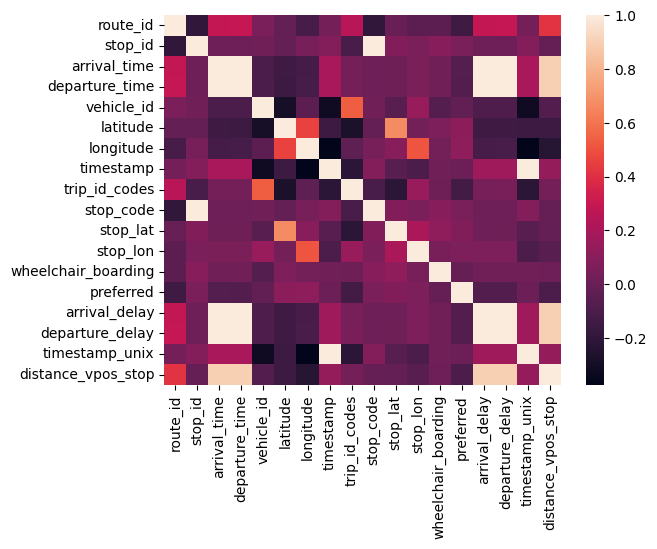

In [211]:
# df.drop(['stop_name'], inplace=True, axis=1)
# df.drop(['location_type'], inplace=True, axis=1)
df.corr()
sns.heatmap(df.corr())

In [212]:
df.info()
df['arrival_time'] = pd.to_datetime(df['arrival_time'], unit='s', errors='coerce')
df['departure_time'] = pd.to_datetime(df['departure_time'], unit='s', errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   route_id             1220 non-null   int64         
 1   stop_id              1220 non-null   int64         
 2   arrival_time         1220 non-null   datetime64[ns]
 3   departure_time       1220 non-null   datetime64[ns]
 4   vehicle_id           1220 non-null   int64         
 5   latitude             1220 non-null   float64       
 6   longitude            1220 non-null   float64       
 7   timestamp            1220 non-null   datetime64[ns]
 8   trip_id_codes        1220 non-null   int8          
 9   stop_code            1220 non-null   int64         
 10  stop_lat             1220 non-null   float64       
 11  stop_lon             1220 non-null   float64       
 12  wheelchair_boarding  1220 non-null   int64         
 13  preferred            1220 non-nul

In [213]:
df.dropna(subset=['arrival_time','departure_time','timestamp'], inplace=True)

In [221]:
# create target variables 
df['arrival_delay'] = (df['arrival_time'] - df['timestamp']).dt.total_seconds()
df['departure_delay'] = (df['departure_time'] - df['timestamp']).dt.total_seconds()


In [222]:
# feature engineering
features = ['distance_vpos_stop', 'timestamp']
df['timestamp_unix'] = df['timestamp'].astype('int64') // 10**9


In [252]:
from sklearn.model_selection import train_test_split

x = df[['latitude', 'longitude', 'stop_lat', 'stop_lon', 'distance_vpos_stop', 'timestamp_unix', 'stop_id', 'route_id']]
y = df[['arrival_delay']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [253]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

Ridge()

In [255]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("Coefficients:", model.coef_)

MSE: 87117.65976130406
MAE: 231.88780158465025
Coefficients: [-6.27016420e+02  7.93210307e+02  3.86736180e+02  3.58996717e+02
  1.25281394e-01  2.64287731e+00 -5.63639042e-05 -2.35381904e-01]


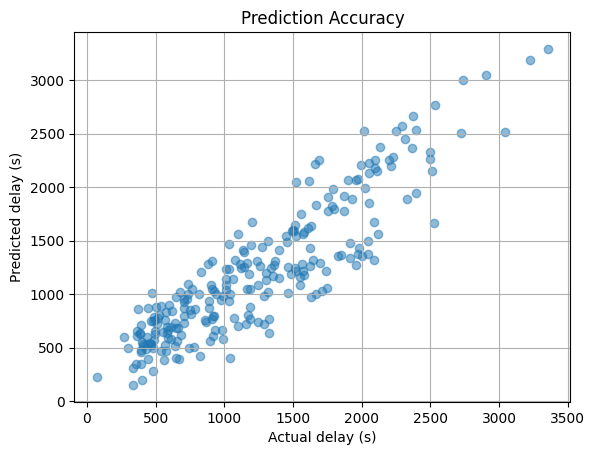

In [256]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual delay (s)")
plt.ylabel("Predicted delay (s)")
plt.title("Prediction Accuracy")
plt.grid(True)
plt.show()

In [261]:
# random forest
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)


/home/josiah/.local/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [267]:
from math import sqrt

y_pred = random_forest.predict(x_test)
random_forest_mse = mean_squared_error(y_test, y_pred)
random_forest_mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print("MSE:", random_forest_mse)
print("MAE:", random_forest_mae)
print("RMSE:", rmse)

MSE: 15642.548856557378
MAE: 86.31803278688525
RMSE: 125.07017572769848


In [277]:
import pandas as pd

# New sample input
new_data = {
    'latitude': 43.932981,
    'longitude': -78.878826,
    'stop_lat': 43.943436,
    'stop_lon': -78.894964,
    'distance_vpos_stop': 2130,  # meters
    'timestamp': pd.Timestamp('2025-03-22T20:19:00Z'),
    'stop_id': 3537,
    'route_id': 901
}


# Create a DataFrame
new_df = pd.DataFrame([new_data])

# Convert timestamp
new_df['timestamp_unix'] = new_df['timestamp'].astype('int64') // 10**9

# Encode stop_id & route_id using your previous mappings
# new_df['stop_id'] = new_df['stop_id'].map(stop_id_map)
# new_df['route_id'] = new_df['route_id'].map(route_id_map)

# Select features
features = ['latitude', 'longitude', 'stop_lat', 'stop_lon', 'distance_vpos_stop', 'timestamp_unix', 'stop_id', 'route_id']
X_new = new_df[features] 
# Predict delay (in seconds)
predicted_delay = random_forest.predict(X_new)[0]

# Convert delay to estimated arrival time
estimated_arrival = new_data['timestamp'] + pd.to_timedelta(predicted_delay, unit='s')

print("🚍 Predicted delay (seconds):", round(predicted_delay, 2))
print("📍 Estimated arrival time:", estimated_arrival)


🚍 Predicted delay (seconds): 471.51
📍 Estimated arrival time: 2025-03-22 20:26:51.510000+00:00
